# Simple models are better models
![William_of_Ockham_-_Logica_1341.jpg](kuvat/William_of_Ockham_-_Logica_1341_s.jpg)

<span id="kuvaviite">Ockham - from a manuscipt of Ockham's Summa Logicae, MS Gonville and Caius College, Cambridge, 464/571, fol. 69r</span>

> "Simpler solutions are more likely to be correct than complex ones"
>
        >William of Ockham
        

## Regularization
Can you solve the following system of equations?
$$
\begin{cases} 3x + y + z = 5\\ 8x – 4y =  4z\end{cases}
$$

The equation system is underdetermined, and there it does not have unique solution. You can solve it by adding some additional information:
$$
   z=0 \rightarrow x=1, y=2
$$

Or add an additional requirement:
$$
   \min (x^2 + y^2 + z^2)
$$

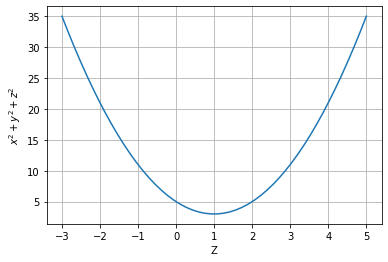

In [14]:
import numpy as np
import matplotlib.pyplot as plt
z=np.linspace(-3,5)
y=2-z
x=1
plt.plot(z, x**2+y**2+z**2)
plt.xlabel('Z')
plt.ylabel('$x^2 + y^2 + z^2$')
plt.grid()

With this contraint, the optimal solution is:

$$
\begin{cases} x = 1\\ y=1 \\ z=1\end{cases}
$$

<div class="laatikko">Regularization is a method in adding information (requirement) to solve a system or to avoid overfitting by reducing degrees of freedom.</div>

# Linear regression
### Ordinary Least Mean Squares using p-features
$$
    \hat{y}_i = \beta_1 x_{i,1} + \beta_2 x_{i,2} + \beta_3 x_{i,3} + \cdots + \beta_p x_{i,p} + \epsilon_i
$$

Cost function to be minimized (square error):
$$
   Obj(\Theta) = L(\Theta) = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$


* Classic regression, usually the first choice
* Does not work well when **p is large** and there is **noise** in the training data


### L2 regularization, Ridge regression
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \underbrace{\lambda \sum_{j=1}^p \beta_j^2}_{\Omega(\Theta)}
$$

* Regularization term, $\Omega(\Theta)$, makes it suitable for higher dimensional data
* Minimal unbiased estimator in certain cases
* Can be solved in closed form
* All coefficients are always kept -> **Does not provide a parsimonious model**


-------L
Cost function for OLS
$$
   L(\Theta)_{OLS} = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$

-------
<div class=citation>
Hoerl, Arthur E., ja Robert W. Kennard. ”Ridge Regression: Biased Estimation for Nonorthogonal Problems”. Technometrics 12, nro 1 (1. Feb 1970): 55–67. https://doi.org/10.1080/00401706.1970.10488634.
</div>

### L1 regularization, LASSO
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p |\beta_j|
$$

* L1 regularization tends to lead solutions where many coefficients, $\beta_i$ will be zeros -> **sparse model**.
* Only iterative solutions are available, but for example <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html">Least Angle Regression</a> (LARS) is fast method for finding LASSO solution
* Will saturate if p>n, and select at maximum n feautures
* in cases where n>p and high correlation between predictors, L1 is worse than L2

-------
Cost function for OLS
$$
   L(\Theta)_{OLS} = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$

-----
<div class="citation">Tibshirani, Robert. ”Regression Shrinkage and Selection Via the Lasso”. Journal of the Royal Statistical Society: Series B (Methodological) 58, nro 1 (1996): 267–88. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x.
</div>

### Elastic nets
$$
   Obj(\Theta) = \underbrace{\sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2}_{L(\Theta)} + \lambda \sum_{j=1}^p \left( (1-\alpha) \beta_i^2 + \alpha |\beta_j| \right)
$$

* Elastic net can perform like Rigde regression, when $\alpha$=0 or like LASSO when $\alpha$=1
* For suitable value of, $\alpha$, elastic net will also produce sparse model, but it does not saturate to in cases when n<p like LASSO.
* Can tolerate correlation between predictors
* Can be computed interatively quite efficiently


-------
Cost function for OLS
$$
   L(\Theta)_{OLS} = \sum_{i=1}^{n} (y_i - \sum_{j=1}^p \beta_j x_{ij})^2
$$


-----

<div class="citation">Zou, Hui, ja Trevor Hastie. ”Regularization and variable selection via the elastic net”. Journal of the Royal Statistical Society: Series B (Statistical Methodology) 67, nro 2 (1. April 2005): 301–20. https://doi.org/10.1111/j.1467-9868.2005.00503.x.</div>


### Gradient Tree Boosting 
 - Also called as Gradient Boosted Regression Trees (GBRT)
 - The GBRT has similar formal loss function and measure for complexity as linear regrssion
 
 $$Obj(\Theta) = \underbrace{L(\Theta)}_{Training Loss} + \underbrace{\Omega(\Theta)}_{Regularization}$$
 
 

## Boston house prizes example

Can the house prizes be predicted? Which parameters affect most to the house prizes?

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per \$10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [3]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.model_selection import cross_val_score

boston=load_boston()
X, y = boston['data'], boston['target']

CV score.......... 0.35327592439588484
Training score.... 0.7406426641094095


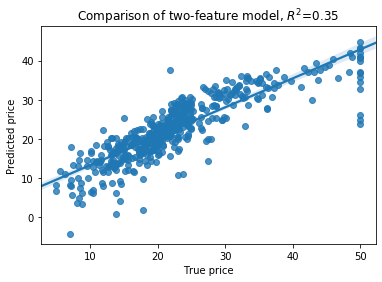

In [4]:
# Ordinary Linear Regression First
lr=LinearRegression()
lr.fit(X,y)
yhat=lr.predict(X)
RsquaredCV=cross_val_score(lr, X, y, cv=5).mean()
RsquaredTR=lr.score(X,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.38921758241024024
Training score.... 0.7388703133867616


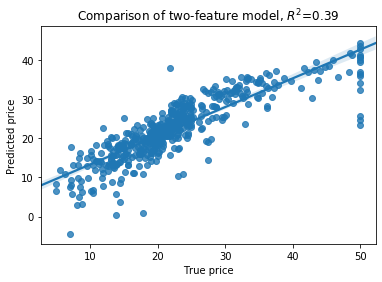

In [5]:
# Then L2 regularized Ridge Regression
rr=Ridge()
rr.fit(X,y)
yhat=rr.predict(X)
RsquaredCV=cross_val_score(rr, X, y, cv=5).mean()
RsquaredTR=rr.score(X,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.431848787926522
Training score.... 0.6825842212709925


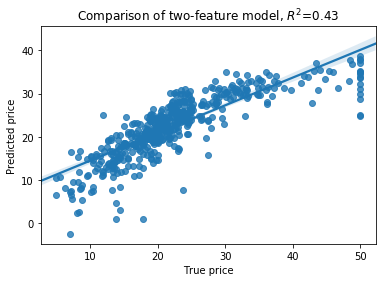

In [6]:
# L1 regularized Lasso Regerssion
la=Lasso()
la.fit(X,y)
yhat=la.predict(X)
RsquaredCV=cross_val_score(la, X, y, cv=5).mean()
RsquaredTR=la.score(X,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

CV score.......... 0.47265251919410584
Training score.... 0.6861018474345026


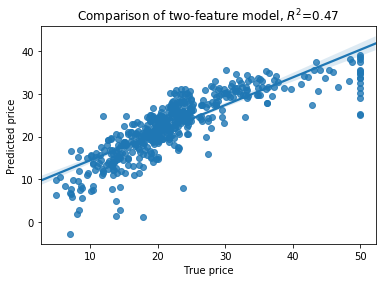

In [7]:
# L2 + L1 regularized Elastic Net
en=ElasticNet()
en.fit(X,y)
yhat=en.predict(X)
RsquaredCV=cross_val_score(en, X, y, cv=5).mean()
RsquaredTR=en.score(X,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

In [8]:
# Lets use Elastic Net for selecting the most relevant features
#model = LassoCV(cv=5)
model = ElasticNetCV(cv=5)

sfm = SelectFromModel(model, threshold=0.3)
sfm.fit(X, y)

print(sfm.transform(X).shape)
print("Selected variables are", sfm.transform([boston['feature_names'], boston['feature_names']])[0])
        

(506, 4)
Selected variables are ['RM' 'DIS' 'PTRATIO' 'LSTAT']


CV score.......... 0.3820025441846835
Training score.... 0.6820275797709414


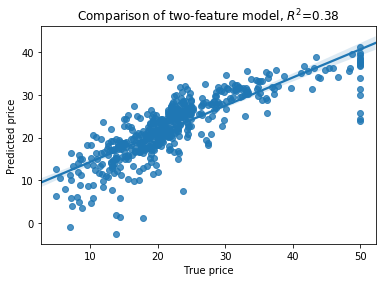

In [9]:
model.fit(sfm.transform(X), y)
yhat=model.predict(sfm.transform(X))
RsquaredCV=cross_val_score(model, sfm.transform(X), y, cv=5).mean()
RsquaredTR=model.score(sfm.transform(X),y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)

## Gradient tree regression

CV score.......... 0.6229871999265952
Training score.... 0.9698702241100551


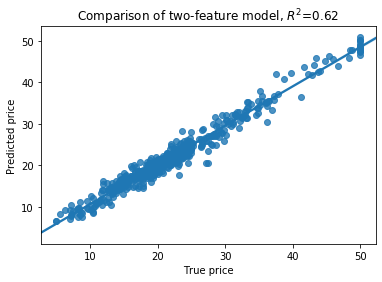

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
#                                max_depth=2, random_state=0, loss='ls')
est = GradientBoostingRegressor(max_features=3)
est.fit(X, y)
yhat=est.predict(X)
RsquaredCV=cross_val_score(est, X, y, cv=5).mean()
RsquaredTR=est.score(X,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

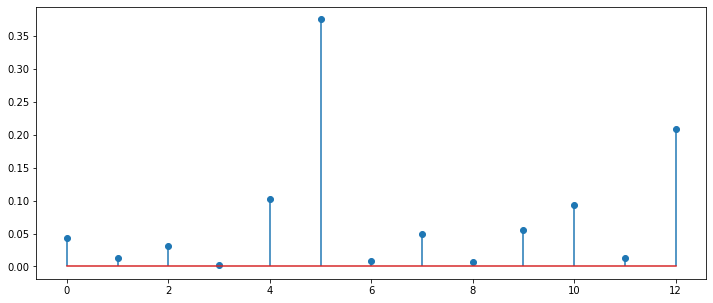

In [15]:
# Plot the importance of each feature
plt.figure(figsize=(12,5))
#Rsquared=sum((yhat-np.mean(y))**2)/sum((y-np.mean(y))**2)
i=range(len(boston.feature_names))
plt.stem(est.feature_importances_, use_line_collection=True)
ax=plt.gca()
#ax.set_xticklabels(boston.feature_names);

In [12]:
for i in range(len(boston.feature_names)):
    print("%2d %8s=%5.2f" % (i,boston.feature_names[i], est.feature_importances_[i]))

 0     CRIM= 0.04
 1       ZN= 0.01
 2    INDUS= 0.03
 3     CHAS= 0.00
 4      NOX= 0.10
 5       RM= 0.38
 6      AGE= 0.01
 7      DIS= 0.05
 8      RAD= 0.01
 9      TAX= 0.05
10  PTRATIO= 0.09
11        B= 0.01
12    LSTAT= 0.21


[ 5 12  4]
(506, 3)
CV score.......... 0.6559475642817896
Training score.... 0.9530426862958163


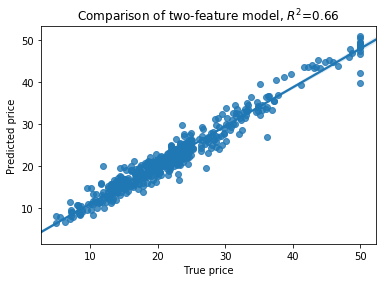

In [13]:
selected=est.feature_importances_.argsort()[-1:-4:-1]
print(selected)

Xs=X[:,selected]
print(Xs.shape)

ests = GradientBoostingRegressor()
ests.fit(Xs, y)
yhat=ests.predict(Xs)
RsquaredCV=cross_val_score(ests, Xs, y, cv=5).mean()
RsquaredTR=ests.score(Xs,y)

sns.regplot(y,yhat)
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
